# Introduction

Base on the materials provided which includes the LEHD WAC data which is based on census block geographies, then in order to calculate and aggregate the number of jobs for the Queens Community District 2 (CD 402). The first step is to find a crosswalk which census blocks can be mapped to the community district. But I will first take a quick at examining the data first below

In [2]:
# first import necessary libraries for initial data exploration
import pandas as pd

In [3]:
# do some inspection of the LEHD WAC file
lehd = pd.read_csv("data/NY_LEHD_WAC_2021_ZIP.csv")

lehd.head()

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
0,360010001001003,2,0,2,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,20231016
1,360010001001004,51,6,41,4,3,3,45,0,0,...,0,0,0,0,0,0,0,0,0,20231016
2,360010001001005,33,6,16,11,1,4,28,0,0,...,0,0,0,0,0,0,0,0,0,20231016
3,360010001001006,38,7,24,7,6,5,27,0,0,...,0,0,0,0,0,0,0,0,0,20231016
4,360010001001007,127,13,77,37,15,23,89,0,0,...,0,0,0,0,0,0,0,0,0,20231016


In [4]:
lehd.describe()

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
count,1.045200e+05,104520.000000,104520.000000,104520.000000,104520.000000,104520.000000,104520.000000,104520.000000,104520.000000,104520.000000,...,104520.0,104520.0,104520.0,104520.0,104520.0,104520.0,104520.0,104520.0,104520.0,104520.0
mean,3.606615e+14,83.013863,17.231544,44.971039,20.811280,13.288662,21.239074,48.486127,0.245666,0.043571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20231016.0
std,3.273989e+11,474.875480,93.756150,276.047506,121.020845,93.175138,97.767348,359.377623,3.429787,2.111551,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.600100e+14,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20231016.0
25%,3.604702e+14,3.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20231016.0
50%,3.606502e+14,10.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20231016.0
75%,3.609106e+14,41.000000,9.000000,20.000000,11.000000,8.000000,13.000000,16.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20231016.0
max,3.612315e+14,44091.000000,6423.000000,26738.000000,15603.000000,20261.000000,6101.000000,41760.000000,335.000000,429.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20231016.0


Quick notes on the dataset the first column is the census track serves as the primary key with total 104,520 row. According to the CNS01 - CNS20 could be mapped to specific NAICS codes. Also worth pointing out all the columns data types seems to be automatically assumed as numeric. 

# Geography

Now in order to map these values to their geographies. One way to handle the task is using the boundaries files to create spatial joins to find all the cenesus blocks lie within the . On the other hand, the Population division at DCP provdes a very clear [relationship file between the common geographies](https://www.nyc.gov/site/planning/planning-level/nyc-population/nyc-population-geographic-relationships.page) for the 2020 updated version including from census block. So I am gonna use their relationship file as the crosswalk between census block and CDTA. However,since CDTA does not completely overlap with CD. Let's take the spatial join appraoch. 

In [49]:
cb_cd = pd.read_excel("data/nyc_2020_census_block_ct_nta_cdta_relationships.xlsx")

# selecting the CDTACode for the Queens Community District 2
cb_cd.loc[cb_cd["CDTACode"] == "QN02"]

,GEOID,CountyFIPS,BoroCode,BoroName,BCTCB2020,CB2020,CBLabel,BoroCT2020,CT2020,CTLabel,NTACode,NTAType,NTAName,NTAAbbrev,CDTACode,CDTAType,CDTAName
6426,360810229001000,81,4,Queens,40229001000,1000,Block 1000,4022900,22900,229.0,QN0271,7,Calvary & Mount Zion Cemeteries,ClvryCem,QN02,CD,QN02 Long Island City-Sunnyside-Woodside (CD 2...
6427,360810229001001,81,4,Queens,40229001001,1001,Block 1001,4022900,22900,229.0,QN0271,7,Calvary & Mount Zion Cemeteries,ClvryCem,QN02,CD,QN02 Long Island City-Sunnyside-Woodside (CD 2...
6428,360810229001002,81,4,Queens,40229001002,1002,Block 1002,4022900,22900,229.0,QN0271,7,Calvary & Mount Zion Cemeteries,ClvryCem,QN02,CD,QN02 Long Island City-Sunnyside-Woodside (CD 2...
6429,360810229001003,81,4,Queens,40229001003,1003,Block 1003,4022900,22900,229.0,QN0271,7,Calvary & Mount Zion Cemeteries,ClvryCem,QN02,CD,QN02 Long Island City-Sunnyside-Woodside (CD 2...
6430,360810229001004,81,4,Queens,40229001004,1004,Block 1004,4022900,22900,229.0,QN0271,7,Calvary & Mount Zion Cemeteries,ClvryCem,QN02,CD,QN02 Long Island City-Sunnyside-Woodside (CD 2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35561,360810489001027,81,4,Queens,40489001027,1027,Block 1027,4048900,48900,489.0,QN0203,0,Woodside,Wdsd,QN02,CD,QN02 Long Island City-Sunnyside-Woodside (CD 2...
35562,360810489001028,81,4,Queens,40489001028,1028,Block 1028,4048900,48900,489.0,QN0203,0,Woodside,Wdsd,QN02,CD,QN02 Long Island City-Sunnyside-Woodside (CD 2...
35563,360810489002000,81,4,Queens,40489002000,2000,Block 2000,4048900,48900,489.0,QN0203,0,Woodside,Wdsd,QN02,CD,QN02 Long Island City-Sunnyside-Woodside (CD 2...
35564,360810489002001,81,4,Queens,40489002001,2001,Block 2001,4048900,48900,489.0,QN0203,0,Woodside,Wdsd,QN02,CD,QN02 Long Island City-Sunnyside-Woodside (CD 2...


Something worth noting here is the as the table for crosswalk also indicates. Census blocks do not consistently have a one-to-one relationship with community district as they do with CDTA which are specifically built out of census tracts. 

In [50]:
# selecting the CDTACode for the 
cb_cd.loc[cb_cd["CDTACode"] == "QN02"]

,GEOID,CountyFIPS,BoroCode,BoroName,BCTCB2020,CB2020,CBLabel,BoroCT2020,CT2020,CTLabel,NTACode,NTAType,NTAName,NTAAbbrev,CDTACode,CDTAType,CDTAName
6426,360810229001000,81,4,Queens,40229001000,1000,Block 1000,4022900,22900,229.0,QN0271,7,Calvary & Mount Zion Cemeteries,ClvryCem,QN02,CD,QN02 Long Island City-Sunnyside-Woodside (CD 2...
6427,360810229001001,81,4,Queens,40229001001,1001,Block 1001,4022900,22900,229.0,QN0271,7,Calvary & Mount Zion Cemeteries,ClvryCem,QN02,CD,QN02 Long Island City-Sunnyside-Woodside (CD 2...
6428,360810229001002,81,4,Queens,40229001002,1002,Block 1002,4022900,22900,229.0,QN0271,7,Calvary & Mount Zion Cemeteries,ClvryCem,QN02,CD,QN02 Long Island City-Sunnyside-Woodside (CD 2...
6429,360810229001003,81,4,Queens,40229001003,1003,Block 1003,4022900,22900,229.0,QN0271,7,Calvary & Mount Zion Cemeteries,ClvryCem,QN02,CD,QN02 Long Island City-Sunnyside-Woodside (CD 2...
6430,360810229001004,81,4,Queens,40229001004,1004,Block 1004,4022900,22900,229.0,QN0271,7,Calvary & Mount Zion Cemeteries,ClvryCem,QN02,CD,QN02 Long Island City-Sunnyside-Woodside (CD 2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35561,360810489001027,81,4,Queens,40489001027,1027,Block 1027,4048900,48900,489.0,QN0203,0,Woodside,Wdsd,QN02,CD,QN02 Long Island City-Sunnyside-Woodside (CD 2...
35562,360810489001028,81,4,Queens,40489001028,1028,Block 1028,4048900,48900,489.0,QN0203,0,Woodside,Wdsd,QN02,CD,QN02 Long Island City-Sunnyside-Woodside (CD 2...
35563,360810489002000,81,4,Queens,40489002000,2000,Block 2000,4048900,48900,489.0,QN0203,0,Woodside,Wdsd,QN02,CD,QN02 Long Island City-Sunnyside-Woodside (CD 2...
35564,360810489002001,81,4,Queens,40489002001,2001,Block 2001,4048900,48900,489.0,QN0203,0,Woodside,Wdsd,QN02,CD,QN02 Long Island City-Sunnyside-Woodside (CD 2...


In [92]:
import geopandas as gpd

cd = gpd.read_file("data/NYC_Community_Districts_2020/NYC_Community_Districts_2020.shp")

cd_402 = cd.loc[cd["BoroCD"] == 402]
cd_402 = cd_402.to_crs("EPSG:4326")
cd_402.head()

,BoroCD,geometry
23,402,"POLYGON ((-73.89792 40.75424, -73.89797 40.754..."


In [94]:
cb = gpd.read_file("data/NYC_Census_Blocks_2020/NYC_Census_Blocks_2020.shp")
cb = cb.to_crs("EPSG:4326")
cb_cd = cb.sjoin(cd_402, how="inner", predicate="intersects")

cb_cd

,CB2020,BoroCode,BoroName,CT2020,BCTCB2020,GEOID,geometry,index_right,BoroCD
1245,2000,1,Manhattan,008601,10086012000,360610086012000,"POLYGON ((-73.96052 40.74411, -73.96057 40.744...",23,402
7826,1000,4,Queens,000101,40001011000,360810001011000,"POLYGON ((-73.95644 40.74318, -73.95667 40.742...",23,402
7827,1000,4,Queens,000102,40001021000,360810001021000,"POLYGON ((-73.95772 40.74636, -73.95788 40.746...",23,402
7828,1000,4,Queens,000104,40001041000,360810001041000,"POLYGON ((-73.93726 40.74518, -73.93765 40.743...",23,402
7832,1000,4,Queens,000701,40007011000,360810007011000,"POLYGON ((-73.95341 40.74480, -73.95364 40.744...",23,402
...,...,...,...,...,...,...,...,...,...
37289,4006,4,Queens,029100,40291004006,360810291004006,"POLYGON ((-73.89748 40.75242, -73.89759 40.752...",23,402
37355,2002,4,Queens,024500,40245002002,360810245002002,"POLYGON ((-73.90639 40.74041, -73.90642 40.739...",23,402
37356,4002,4,Queens,024500,40245004002,360810245004002,"POLYGON ((-73.90648 40.73859, -73.90652 40.737...",23,402
37564,1005,4,Queens,021900,40219001005,360810219001005,"POLYGON ((-73.91836 40.72593, -73.91796 40.725...",23,402


Noting that we chose the intersect will end up with more census block incldued since the census blocks and community districts does not have a one-to-one relationship. We can "prune" the results further manually but due to time constraint I won't do that here. Also check the results visually below. 

<Axes: >

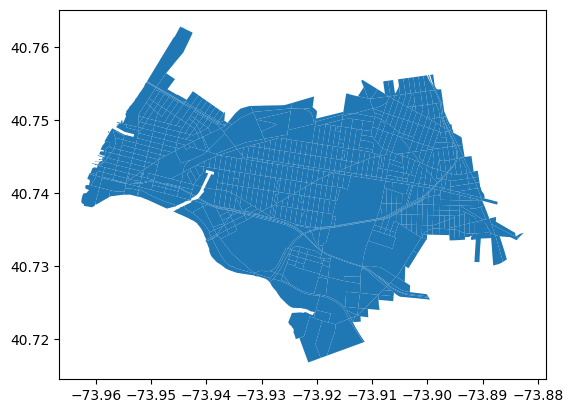

In [95]:
cb_cd.plot()

In [150]:
#filtering the LEHD data within the CD
lehd["w_geocode"] = lehd["w_geocode"].astype(int).astype(str)
lehd_402 = cb_cd[["GEOID", "geometry"]].merge(lehd, left_on="GEOID", right_on="w_geocode",)

print(f"there are in total {lehd_402.shape[0]} census tracts from CD 402 incldued in the LEHD data")
lehd_402.head()

there are in total 624 census tracts from CD 402 incldued in the LEHD data


,GEOID,geometry,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,...,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
0,360810001011000,"POLYGON ((-73.95644 40.74318, -73.95667 40.742...",360810001011000,227,41,126,60,49,56,122,...,0,0,0,0,0,0,0,0,0,20231016
1,360810001041000,"POLYGON ((-73.93726 40.74518, -73.93765 40.743...",360810001041000,21,3,13,5,5,4,12,...,0,0,0,0,0,0,0,0,0,20231016
2,360810007011000,"POLYGON ((-73.95341 40.74480, -73.95364 40.744...",360810007011000,165,34,97,34,35,36,94,...,0,0,0,0,0,0,0,0,0,20231016
3,360810169001000,"POLYGON ((-73.90971 40.74975, -73.90990 40.749...",360810169001000,806,182,494,130,33,71,702,...,0,0,0,0,0,0,0,0,0,20231016
4,360810171021000,"POLYGON ((-73.91446 40.75368, -73.91354 40.753...",360810171021000,938,326,416,196,232,423,283,...,0,0,0,0,0,0,0,0,0,20231016


Started with 

<Axes: >

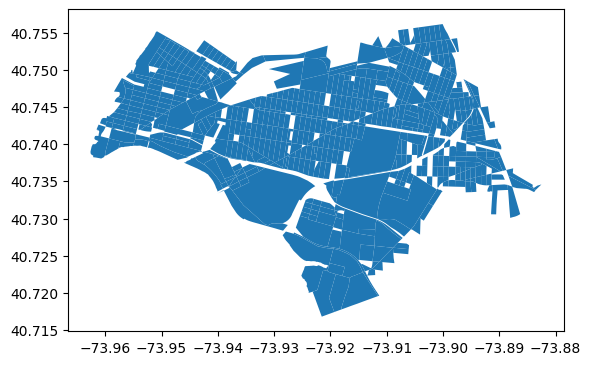

In [100]:
lehd_402.plot()

Clearly some of the census blocks are missing from this. What are those and why are they missing. Are they missing from the WAC data from the beginning?

In [106]:
cb_cd.loc[~cb_cd["GEOID"].isin(lehd_402["GEOID"])]

,CB2020,BoroCode,BoroName,CT2020,BCTCB2020,GEOID,geometry,index_right,BoroCD
1245,2000,1,Manhattan,008601,10086012000,360610086012000,"POLYGON ((-73.96052 40.74411, -73.96057 40.744...",23,402
7827,1000,4,Queens,000102,40001021000,360810001021000,"POLYGON ((-73.95772 40.74636, -73.95788 40.746...",23,402
7839,1000,4,Queens,001901,40019011000,360810019011000,"POLYGON ((-73.94171 40.74613, -73.94274 40.746...",23,402
7951,1000,4,Queens,017101,40171011000,360810171011000,"POLYGON ((-73.90956 40.75104, -73.90950 40.750...",23,402
7978,1000,4,Queens,019902,40199021000,360810199021000,"POLYGON ((-73.93508 40.73749, -73.93529 40.737...",23,402
...,...,...,...,...,...,...,...,...,...
37213,1003,4,Queens,019903,40199031003,360810199031003,"POLYGON ((-73.92257 40.73429, -73.92298 40.734...",23,402
37233,2015,4,Queens,000701,40007012015,360810007012015,"POLYGON ((-73.95186 40.74170, -73.95188 40.741...",23,402
37234,2006,4,Queens,000701,40007012006,360810007012006,"POLYGON ((-73.95153 40.74223, -73.95140 40.742...",23,402
37235,2017,4,Queens,000701,40007012017,360810007012017,"POLYGON ((-73.94951 40.74171, -73.94953 40.741...",23,402


# Mapping Sector Industry and Aggregate

Using the DCP_macro_sector_definitions table received, I will create add additional column helping to map the data we are getting from the . To further get the macro results, aggregate these based on macro sector

In [104]:
macro_sector_def = pd.read_excel("data/DCP_macro_sector_definitions.xlsx")

macro_sector_def

,NAICS Sector Code,NAICS Sector Title,Macro Sector
0,11,"Agriculture, Forestry, Fishing and Hunting",Industrial
1,21,"Mining, Quarying, and Oil and Gas Extraction",Industrial
2,22,Utilities,Industrial
3,23,Construction,Industrial
4,31-33,Manufacturing,Industrial
5,42,Wholesale Trade,Industrial
6,44-45,Retail Trade,Local Services
7,48-49,Transportation and Warehousing,Industrial
8,51,Information,Office
9,52,Finance and Insurance,Office


In [110]:
# using the data dictionary from the doc to create the mapping relationship between 
# NAICS sector code and column in LEHD

macro_sector_def["WAC_Code"] = [f"CNS{i:02d}" for i  in range(1, 22)]

macro_sector_def

,NAICS Sector Code,NAICS Sector Title,Macro Sector,WAC_Code
0,11,"Agriculture, Forestry, Fishing and Hunting",Industrial,CNS01
1,21,"Mining, Quarying, and Oil and Gas Extraction",Industrial,CNS02
2,22,Utilities,Industrial,CNS03
3,23,Construction,Industrial,CNS04
4,31-33,Manufacturing,Industrial,CNS05
5,42,Wholesale Trade,Industrial,CNS06
6,44-45,Retail Trade,Local Services,CNS07
7,48-49,Transportation and Warehousing,Industrial,CNS08
8,51,Information,Office,CNS09
9,52,Finance and Insurance,Office,CNS10


Noting here "CNS21" is created to hold place for the unclassified services which is not included in the WAC data to begin with but calculated from the total number of jobs "C000" and substracting the total of other sectors

In [116]:
# first calculate the number of unclassified jobs 
lehd_402["CNS21"] = lehd_402["C000"] - lehd_402[[f"CNS{i:02d}" for i  in range(1, 21)]].sum(axis=1)

# create the short table to only include relevant columns and check the results
lehd_402_short = lehd_402[[f"CNS{i:02d}" for i  in range(1, 22)]]

lehd_402_short.describe()


,CNS01,CNS02,CNS03,CNS04,CNS05,CNS06,CNS07,CNS08,CNS09,CNS10,...,CNS12,CNS13,CNS14,CNS15,CNS16,CNS17,CNS18,CNS19,CNS20,CNS21
count,624.000000,624.0,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,...,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.0
mean,0.011218,0.0,0.020833,24.964744,9.060897,10.807692,15.116987,23.887821,2.591346,4.754808,...,5.570513,1.437500,26.189103,6.919872,12.418269,0.756410,5.985577,3.681090,23.620192,0.0
std,0.243442,0.0,0.406072,87.860180,40.338569,43.491755,97.892368,334.101873,23.034164,56.079162,...,23.082895,24.611184,356.381011,37.533463,80.948310,5.396476,14.444384,9.479008,196.226934,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.0,0.000000,8.250000,1.000000,3.250000,4.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,3.000000,0.000000,0.0
max,6.000000,0.0,10.000000,1058.000000,548.000000,649.000000,1907.000000,7874.000000,467.000000,1244.000000,...,266.000000,600.000000,8083.000000,369.000000,1146.000000,79.000000,159.000000,96.000000,3648.000000,0.0


In [142]:
lehd_402_short.iloc[:, :-1].describe()

,CNS01,CNS02,CNS03,CNS04,CNS05,CNS06,CNS07,CNS08,CNS09,CNS10,CNS11,CNS12,CNS13,CNS14,CNS15,CNS16,CNS17,CNS18,CNS19,CNS20
count,624.000000,624.0,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,0.011218,0.0,0.020833,24.964744,9.060897,10.807692,15.116987,23.887821,2.591346,4.754808,3.341346,5.570513,1.437500,26.189103,6.919872,12.418269,0.756410,5.985577,3.681090,23.620192
std,0.243442,0.0,0.406072,87.860180,40.338569,43.491755,97.892368,334.101873,23.034164,56.079162,14.216413,23.082895,24.611184,356.381011,37.533463,80.948310,5.396476,14.444384,9.479008,196.226934
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,8.250000,1.000000,3.250000,4.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,3.000000,0.000000
max,6.000000,0.0,10.000000,1058.000000,548.000000,649.000000,1907.000000,7874.000000,467.000000,1244.000000,216.000000,266.000000,600.000000,8083.000000,369.000000,1146.000000,79.000000,159.000000,96.000000,3648.000000


In [121]:
# create a single-column dataframe for easy join with the existing macro sector table
# to get the by sector total employment for CD
employment = pd.DataFrame(
    lehd_402_short.sum().values, 
    columns=["2021 Employment"],
    index=lehd_402_short.columns
    )

sector_employment = pd.concat([macro_sector_def.set_index("WAC_Code"), employment], axis=1, verify_integrity=True)

sector_employment


,NAICS Sector Code,NAICS Sector Title,Macro Sector,2021 Employment
CNS01,11,"Agriculture, Forestry, Fishing and Hunting",Industrial,7
CNS02,21,"Mining, Quarying, and Oil and Gas Extraction",Industrial,0
CNS03,22,Utilities,Industrial,13
CNS04,23,Construction,Industrial,15578
CNS05,31-33,Manufacturing,Industrial,5654
CNS06,42,Wholesale Trade,Industrial,6744
CNS07,44-45,Retail Trade,Local Services,9433
CNS08,48-49,Transportation and Warehousing,Industrial,14906
CNS09,51,Information,Office,1617
CNS10,52,Finance and Insurance,Office,2967


In [151]:
sector_employment.sort_values(by="2021 Employment", ascending=False)


,NAICS Sector Code,Sector,Macro Sector,2021 Employment
CNS14,56,Administrative and Support and Waste Managemen...,Office,16342
CNS04,23,Construction,Industrial,15578
CNS08,48-49,Transportation and Warehousing,Industrial,14906
CNS20,92,Public Administration,Public Administration,14739
CNS07,44-45,Retail Trade,Local Services,9433
CNS16,62,Health Care and Social Assistance,Institutional,7749
CNS06,42,Wholesale Trade,Industrial,6744
CNS05,31-33,Manufacturing,Industrial,5654
CNS15,61,Educational Services,Institutional,4318
CNS18,72,Accomodation and Food Services,Local Services,3735


Also need to get the macro sector number and combine the results from the last one to create the total employment number for the CD

In [139]:
# get the groupby total for macro sector and join with the sector employment results
# to create the final 
macro_employment = sector_employment.groupby("Macro Sector")["2021 Employment"].sum().reset_index()

macro_employment.loc[len(macro_employment)] = {
        "Macro Sector": "Total", 
        "2021 Employment": macro_employment["2021 Employment"].sum()
    }

macro_employment.rename(columns={"Macro Sector": "Sector"}, inplace=True)

sector_employment.rename(columns={"NAICS Sector Title": "Sector"}, inplace=True)

final = pd.concat(
    [
        macro_employment, 
        sector_employment[["Sector", "2021 Employment"]]
    ],
    )

final

,Sector,2021 Employment
0,Industrial,42902
1,Institutional,12067
2,Local Services,15937
3,Office,27384
4,Public Administration,14739
5,Total,113029
CNS01,"Agriculture, Forestry, Fishing and Hunting",7
CNS02,"Mining, Quarying, and Oil and Gas Extraction",0
CNS03,Utilities,13
CNS04,Construction,15578


In [179]:
final.to_csv("output.csv", index=False)

In [158]:
lehd_402.head()

,geometry,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,...,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
GEOID,,,,,,,,,,,,,,,,,,,,,
360810001011000,"POLYGON ((-73.95644 40.74318, -73.95667 40.742...",360810001011000,227,41,126,60,49,56,122,0,...,0,0,0,0,0,0,0,0,0,20231016
360810001041000,"POLYGON ((-73.93726 40.74518, -73.93765 40.743...",360810001041000,21,3,13,5,5,4,12,0,...,0,0,0,0,0,0,0,0,0,20231016
360810007011000,"POLYGON ((-73.95341 40.74480, -73.95364 40.744...",360810007011000,165,34,97,34,35,36,94,0,...,0,0,0,0,0,0,0,0,0,20231016
360810169001000,"POLYGON ((-73.90971 40.74975, -73.90990 40.749...",360810169001000,806,182,494,130,33,71,702,0,...,0,0,0,0,0,0,0,0,0,20231016
360810171021000,"POLYGON ((-73.91446 40.75368, -73.91354 40.753...",360810171021000,938,326,416,196,232,423,283,0,...,0,0,0,0,0,0,0,0,0,20231016


In [171]:
from urllib.request import urlopen
import json
import plotly.express as px

# lehd_402.set_index("GEOID", inplace=True)
# lehd_402 = cb_cd.merge(lehd, left_on="GEOID", right_on="w_geocode",)
url = "https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Census_Blocks_for_2020_US_Census/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson"
with urlopen(url=url) as response:
    cb_geojson = json.load(response)

fig = px.choropleth(
    lehd_402,
    locations=lehd_402.index,
    geojson=lehd_402.geometry,
    color="CE02",
    color_continuous_scale="Viridis",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [180]:
import matplotlib.pyplot as plt

# plot correlation matrix given any dataframe which each column is a variable
def plot_correlation_matrix(df: pd.DataFrame) -> None:
    matrix = df.corr()

    #plotting correlation matrix 
    plt.imshow(matrix, cmap='Blues')

    #adding colorbar 
    plt.colorbar()

    #extracting variable names 
    variables = []
    for i in matrix.columns:
        variables.append(i)

    # Adding labels to the matrix
    plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
    plt.yticks(range(len(matrix)), variables)

    # Display the plot
    plt.show()

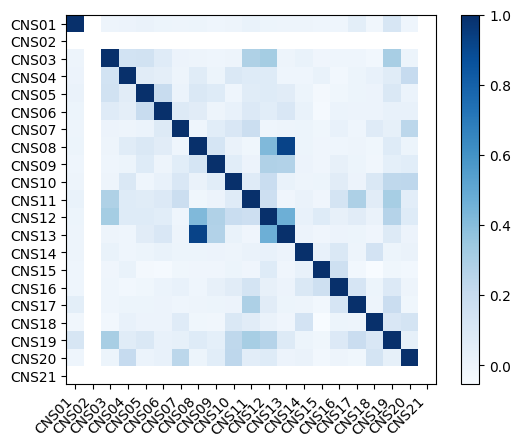

In [184]:
import matplotlib.pyplot as plt


plot_correlation_matrix(lehd_402_short)


It is as if the only the signicantly correlated (using .5 as threshold) is the CNS07 and CNS13 pair but let's normalize the matrix a bit that is using the percentage of the a employment sector as the basis for correlation to see if that makese a different. Since the effects of correlation might be overwhelmed by the total number of jobs in certain census blocks. 

   CNS01  CNS02  CNS03     CNS04     CNS05     CNS06     CNS07  CNS08  \
0    0.0    0.0    0.0  0.004405  0.035242  0.000000  0.070485    0.0   
1    0.0    0.0    0.0  0.142857  0.000000  0.000000  0.142857    0.0   
2    0.0    0.0    0.0  0.521212  0.030303  0.000000  0.018182    0.0   
3    0.0    0.0    0.0  0.054591  0.000000  0.805211  0.000000    0.0   
4    0.0    0.0    0.0  0.041578  0.000000  0.000000  0.849680    0.0   

      CNS09     CNS10  ...     CNS12     CNS13     CNS14     CNS15     CNS16  \
0  0.022026  0.017621  ...  0.026432  0.000000  0.061674  0.008811  0.145374   
1  0.285714  0.000000  ...  0.238095  0.000000  0.000000  0.000000  0.047619   
2  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.024242  0.000000   
3  0.000000  0.000000  ...  0.000000  0.065757  0.000000  0.000000  0.074442   
4  0.101279  0.003198  ...  0.000000  0.000000  0.000000  0.000000  0.000000   

   CNS17     CNS18     CNS19  CNS20  CNS21  
0    0.0  0.171806  0.422907    0.0

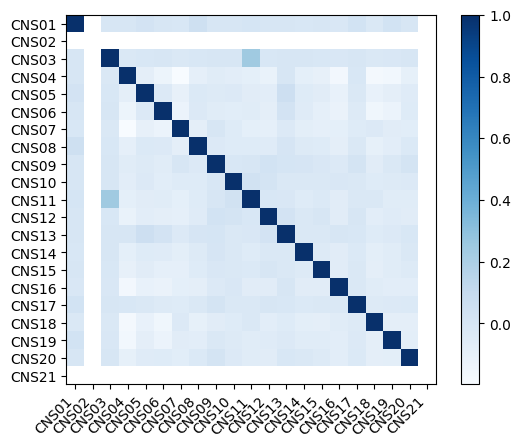

In [182]:
import matplotlib.pyplot as plt

norm_lehd_402_short = lehd_402_short.div(lehd_402_short.sum(axis=1), axis=0)
print(norm_lehd_402_short.head())

plot_correlation_matrix(norm_lehd_402_short)

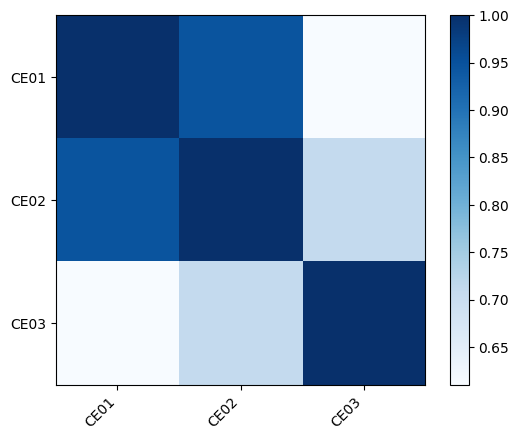

In [183]:
import matplotlib.pyplot as plt

plot_correlation_matrix(lehd_402.iloc[:, 6:9])